# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [8]:
# TODO: niekorzystanie ze zmiennych globalnych typu gios_url_ids wewnątrz funkcji w load_data.py

In [1]:
# W celu automatycznego przeładowywania modułów
%load_ext autoreload
%autoreload 2

In [43]:
import scripts.load_data as ld
import scripts.data_analysis as da
import scripts.visualizations as vis

## Zadanie 1

#### Wczytanie metadanych

In [4]:
metadata = ld.get_metadata()
metadata

,Kod stacji,Stary kod stacji,Miejscowość
0,DsBialka,NaN,Białka
1,DsBielGrot,NaN,Bielawa
2,DsBogatFrancMOB,DsBogatMob,Bogatynia
3,DsBogChop,NaN,Bogatynia
4,DsBogZatonieMob,NaN,Bogatynia
...,...,...,...
1129,ZpSzczPilsud,"ZpSzczecin002, ZpSzczPils02",Szczecin
1130,ZpSzczWSSEEnerg,NaN,Szczecin
1131,ZpSzczWSSESped6,NaN,Szczecin
1132,ZpWalWalczWSSE,NaN,Wałcz


In [5]:
# Słowniki mapujące stare kody na nowe i kody stacji na miast
old_to_new_code, code_to_city = ld.get_code_mappings(metadata)
old_to_new_code

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga': 'KpBydFieldor',
 'KpBydBerling': 'KpB

In [13]:
code_to_city

{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

### Pobranie i preprocessing danych

In [26]:
dfs = []
chosen_years = [2015, 2018, 2021, 2024]
for year in chosen_years:
    print(f'ROK {year}')
    df = ld.download_and_preprocess_data(year,
                                         code_to_city, 
                                         old_to_new_code, 
                                         header_index=1 if year != 2015 else 0)
    print(df.head(3))
    dfs.append(df)

ROK 2015
Miejscowość                Data Jelenia Góra      Wrocław               \
Kod stacji                      DsJelGorOgin DsWrocAlWisn DsWrocWybCon   
3           2015-01-01 01:00:00      151.112           78           50   
4           2015-01-01 02:00:00      262.566           42      33.8244   
5           2015-01-01 03:00:00       222.83           27      28.7215   

Miejscowość    Bydgoszcz                     Toruń       Lublin         Łódź  \
Kod stacji  KpBydPlPozna KpBydWarszaw KpToruDziewu LbLubObywate LdLodzCzerni   
3                   29.2         95.5       27.352      71.1012        59.73   
4                   27.1         86.1      78.0064      95.2582       185.92   
5                    7.9         23.8      21.1056      49.5078        54.25   

Miejscowość               ...      Gliwice     Katowice  Złoty Potok  \
Kod stacji  LdLodzGdansk  ... SlGliwicMewy SlKatoKossut SlZlotPotLes   
3                    NaN  ...       77.828       51.389      49.9464   
4  

### Sanity checks

In [27]:
for df, year in zip(dfs, chosen_years):
    print(f'{year}')
    print(
        f'Liczba dni: {df['Data'].dt.date.nunique()}'
    )
    print(f'Min: {df['Data'].min()}')
    print(f'Max: {df['Data'].max()}')
    print(f'Liczba kolumn: {len(df.columns)}')

2015
Liczba dni: 365
Min: 2015-01-01 01:00:00
Max: 2015-12-31 23:59:59
Liczba kolumn: 45
2018
Liczba dni: 365
Min: 2018-01-01 01:00:00
Max: 2018-12-31 23:59:59
Liczba kolumn: 54
2021
Liczba dni: 365
Min: 2021-01-01 01:00:00
Max: 2021-12-31 23:59:59
Liczba kolumn: 91
2024
Liczba dni: 366
Min: 2024-01-01 01:00:00
Max: 2024-12-31 23:59:59
Liczba kolumn: 99


In [28]:
# Złączenie danych z trzech lat
df = ld.join_data_on_common_stations(dfs)
df

Miejscowość                Data Jelenia Góra      Wrocław               \
Kod stacji                      DsJelGorOgin DsWrocAlWisn DsWrocWybCon   
0           2015-01-01 01:00:00      151.112           78           50   
1           2015-01-01 02:00:00      262.566           42      33.8244   
2           2015-01-01 03:00:00       222.83           27      28.7215   
3           2015-01-01 04:00:00      210.767           24      20.6891   
4           2015-01-01 05:00:00      191.211           22      22.5335   
...                         ...          ...          ...          ...   
35059       2024-12-31 20:00:00         48.3         51.4         27.7   
35060       2024-12-31 21:00:00           67         65.5         19.9   
35061       2024-12-31 22:00:00         72.7         30.2         17.4   
35062       2024-12-31 23:00:00         79.9           36         23.6   
35063       2024-12-31 23:59:59         67.9         50.4         35.4   

Miejscowość    Bydgoszcz                    Lublin         Łódź       Zgierz  \
Kod stacji  KpBydPlPozna KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
0                   29.2         95.5      71.1012        59.73    58.690689   
1                   27.1         86.1      95.2582       185.92    44.501255   
2                    7.9         23.8      49.5078        54.25    24.163937   
3                    7.1         15.9      60.8468        50.15    19.516039   
4                    9.2           15      49.3106        39.17    16.850332   
...                  ...          ...          ...          ...          ...   
35059                5.4         34.1         26.3         33.3         49.5   
35060                7.7         34.6         27.5           34         48.7   
35061               14.5         29.3         26.9         31.7         48.1   
35062                NaN           16         23.5         26.8         38.4   
35063               15.7         13.4         21.4         37.3         45.5   

Miejscowość Zielona Góra  ...       Gdańsk  Kościerzyna     Katowice  \
Kod stacji  LuZielKrotka  ... PmGdaLeczkow PmKosTargowa SlKatoKossut   
0                    NaN  ...          NaN          NaN       51.389   
1                51.8628  ...      75.5278          NaN       37.709   
2                 15.866  ...      8.87389          NaN       41.984   
3                20.1187  ...      8.83194      22.7895       45.404   
4                27.3413  ...       6.5675          NaN       36.854   
...                  ...  ...          ...          ...          ...   
35059               15.9  ...         11.2         14.1         20.3   
35060               16.1  ...           14         12.6         20.1   
35061               15.9  ...         15.8         10.9         27.3   
35062               12.5  ...         16.1         10.2         26.4   
35063               14.7  ...         17.4            8           27   

Miejscowość  Złoty Potok      Olsztyn       Kalisz     Szczecin               \
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud   
0                49.9464    44.060833         25.5          NaN          NaN   
1                45.6291    49.943329         32.5      81.8501      215.379   
2                49.2093    20.688448         24.3      25.7333      27.7458   
3                 53.316    17.437717         24.4       18.624      26.5201   
4                51.5259    15.532262           25      17.6545      31.0393   
...                  ...          ...          ...          ...          ...   
35059               23.8           16         25.4          8.4           14   
35060               28.4         19.3           25         12.8         12.7   
35061               22.5         26.9           24         20.7         12.1   
35062               25.3           23         23.6         13.4         12.7   
35063               20.6         23.4           25         15.6         11.5   

Miejscowość   Rok 

In [29]:
data_path = 'data/pm25_gios_2015_2018_2021_2024.csv'

In [30]:
df.to_csv(data_path, index=False)

In [31]:
# Kod do wczytywania danych z pliku
df = ld.read_data_from_csv(data_path)
df.head(5)

Miejscowość                Data Jelenia Góra      Wrocław               \
Kod stacji                      DsJelGorOgin DsWrocAlWisn DsWrocWybCon   
0           2015-01-01 01:00:00      151.112         78.0      50.0000   
1           2015-01-01 02:00:00      262.566         42.0      33.8244   
2           2015-01-01 03:00:00      222.830         27.0      28.7215   
3           2015-01-01 04:00:00      210.767         24.0      20.6891   
4           2015-01-01 05:00:00      191.211         22.0      22.5335   

Miejscowość    Bydgoszcz                    Lublin         Łódź       Zgierz  \
Kod stacji  KpBydPlPozna KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
0                   29.2         95.5      71.1012        59.73    58.690689   
1                   27.1         86.1      95.2582       185.92    44.501255   
2                    7.9         23.8      49.5078        54.25    24.163937   
3                    7.1         15.9      60.8468        50.15    19.516039   
4                    9.2         15.0      49.3106        39.17    16.850332   

Miejscowość Zielona Góra  ...       Gdańsk  Kościerzyna     Katowice  \
Kod stacji  LuZielKrotka  ... PmGdaLeczkow PmKosTargowa SlKatoKossut   
0                    NaN  ...          NaN          NaN       51.389   
1                51.8628  ...     75.52780          NaN       37.709   
2                15.8660  ...      8.87389          NaN       41.984   
3                20.1187  ...      8.83194      22.7895       45.404   
4                27.3413  ...      6.56750          NaN       36.854   

Miejscowość  Złoty Potok      Olsztyn       Kalisz     Szczecin               \
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud   
0                49.9464    44.060833         25.5          NaN          NaN   
1                45.6291    49.943329         32.5      81.8501     215.3790   
2                49.2093    20.688448         24.3      25.7333      27.7458   
3                53.3160    17.437717         24.4      18.6240      26.5201   
4                51.5259    15.532262         25.0      17.6545      31.0393   

Miejscowość   Rok Miesiąc  
Kod stacji                 
0            2015       1  
1            2015       1  
2            2015       1  
3            2015       1  
4            2015       1  

[5 rows x 33 columns]

## Zadanie 2
#### Średnie miesięczne + trend dla miast


In [33]:
monthly_means = da.get_monthly_means_for_stations(df)

print("Średnie miesięczne dla każdej stacji:")
monthly_means

Średnie miesięczne dla każdej stacji:


Miejscowość  Jelenia Góra      Wrocław                 Bydgoszcz               \
Kod stacji   DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna KpBydWarszaw   
Rok  Miesiąc                                                                    
2015 1          24.504821    32.921321    27.863459    21.016268    25.890511   
     2          41.859821    45.884722    42.238897    45.497710    49.939606   
     3          28.603600    35.995391    32.581978    33.105139    24.413016   
     4          12.323373    19.873433    15.131175    16.357370          NaN   
     5           8.716385    18.487889    13.339719    12.793215    12.668022   
     6           7.791419    18.227356    11.718465     9.976331     9.767814   
     7           6.879472    18.914791    12.158851    10.189889     9.693838   
     8          11.131890    25.153938    18.316188    14.717009    13.796165   
     9           7.141748    19.981177    12.324672    14.417414    14.056662   
     10         23.644826    43.910344    32.489062    35.277361    35.401508   
     11         25.710537    49.637270    43.717427    30.462654    35.870557   
     12         22.893786    34.432793    27.114146    21.933659    30.398732   
2018 1          21.121368    25.598823    25.810687    35.005226    38.350731   
     2          38.070286    45.710670    46.228103    51.506631    48.145126   
     3          35.997834    38.456314    37.214785    45.066158    56.718008   
     4          13.830232    20.700946    18.597148    23.143182    23.061890   
     5          16.161816    16.648540    13.897815    14.156190    15.869706   
     6          13.660109    12.446891    11.547937    12.679838    13.462054   
     7          12.584755    12.095556    10.648858    15.579521    15.000154   
     8          10.960227    12.919487    11.245645    15.657619    16.765751   
     9          14.683143    14.760631    12.584673    16.402166    15.397947   
     10         22.092889    23.661113    21.446295    29.950907    29.287297   
     11         38.153154    34.874046    33.884764    43.474770    43.248240   
     12         19.222373    23.230754    23.156903    27.937650    30.860461   
2021 1          29.901718    29.350533    26.805180    29.057314    22.569471   
     2          34.237084    37.239144    33.639402    41.737349    35.387199   
     3          26.880032    26.893210    23.261149    21.834110    17.558663   
     4          16.038263    16.848903    14.380061    13.227994    11.464154   
     5           8.564051    11.310791     8.337058     5.459014     7.917876   
     6          12.918083    16.228332    12.795795     6.943228     9.429378   
     7          10.734240    13.914004    11.201217    10.412534    10.864631   
     8           8.095207    11.171375     8.401480     5.696176     7.922703   
     9          12.849123    16.687761    12.654480     8.778571    10.094299   
     10         19.165852    19.799261    16.197655    14.645270    15.820652   
     11         26.115729    25.541943    23.671301    16.429630    17.225452   
     12         35.768634    29.465271    28.076707    23.367275    23.207163   
2024 1          23.274866    24.596505    20.246909    17.465593    19.892946   
     2          13.506178    16.553401    14.030460    14.689098    16.090374   
     3          19.934320    24.241184    21.038172    23.096828    23.358587   
     4           9.886528    11.894437     9.803616    11.310778    10.433705   
     5           8.234677    11.041256     9.184274    10.873099     9.573634   
     6           9.513333    10.509471     9.429624     8.961730     9.074722   
     7           7.453763     9.097690     8.482930     7.758732     7.722911   
     8           9.372581    11.574059    13.286649     9.209726     9.179772   
     9          11.491155    13.114571    15.856825    12.913372    13.917500   
     10         13.677898    15.125575    17.468817    13.104191    17.466622   
     11         20.962500    20

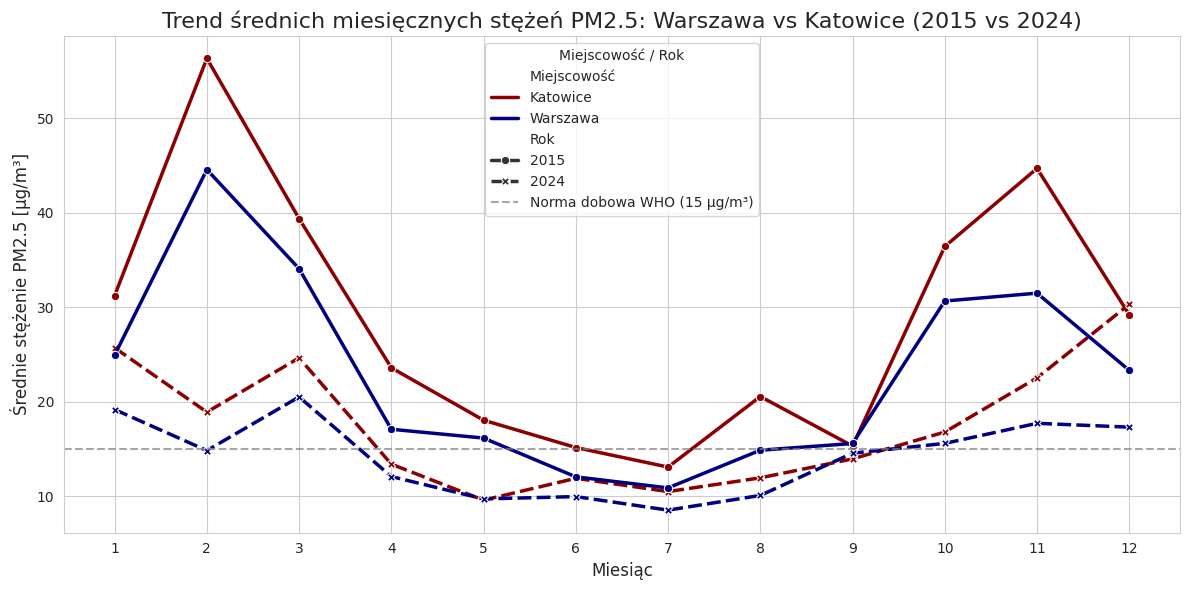

In [50]:
# Wykres trendów dla Katowic i Warszawy w latach 2015 i 2024
chosen_years = [2015, 2024]
chosen_cities = ['Warszawa', 'Katowice']

df_plot = da.get_chosen_monthly_means(df, chosen_years, chosen_cities)
vis.plot_trends_for_chosen_cities(df_plot, chosen_years, chosen_cities)

Wykres przedstawia średnie miesięczne stężenie pyłu PM2.5 dla Warszawy i Katowic, porównując sytuację z roku 2014 (linie przerywane) z rokiem 2024 (linie ciągłe). Dane zostały uśrednione dla wszystkich stacji pomiarowych w obrębie danego miasta.

Wyraźnie widać wysokie stężenia w miesiącach zimowych (styczeń, luty, grudzień) i niskie w letnich. Wskazuje to na kluczową rolę sezonu grzewczego w emisji zanieczyszczeń.

Zarówno w Warszawie, jak i w Katowicach, linie dla roku 2024 znajdują się znacząco niżej niż dla roku 2014 (szczególnie w miesiącach zimowych). Oznacza to znaczną poprawę jakości powietrza w ciągu ostatniej dekady.

Katowice generalnie wykazują wyższe stężenia PM2.5 niż Warszawa, szczególnie w miesiącach zimowych roku 2014, co wynika ze specyfiki regionu i źródeł ogrzewania. Jednak w 2024 roku różnica ta w miesiącach letnich niemal zanika, a w zimowych jest znacznie mniejsza niż dekadę wcześniej.

## Zadanie 3
#### Uśrednienie danych po stacjach w miejscowości i miesiącu w każdym roku

In [35]:
df_means = da.get_monthly_means_for_cities(df)
df_means.head(5)

Miejscowość,Rok,Miesiąc,Białystok,Bydgoszcz,Gdańsk,Jelenia Góra,Kalisz,Katowice,Kościerzyna,Kraków,...,Radom,Siedlce,Szczecin,Warszawa,Wrocław,Zgierz,Zielona Góra,Złoty Potok,Łódź,Żyrardów
0,2015,1,22.464238,24.073891,15.251184,24.504821,32.039886,31.247839,36.803262,42.245296,...,38.148750,23.891594,18.242666,24.928561,28.970504,26.402375,25.087498,20.490547,27.279348,40.944131
1,2015,2,41.037325,46.549402,21.435362,41.859821,48.900846,56.355432,51.354948,66.885357,...,60.714142,44.468838,31.920307,43.598628,44.076439,44.475336,36.030131,36.671320,41.245764,65.601905
2,2015,3,30.945504,32.224481,17.027339,28.603600,41.674071,39.389542,33.843097,51.336555,...,41.123270,36.035519,25.719933,34.042591,34.302060,35.808276,30.291795,24.287572,30.667972,51.063809
3,2015,4,13.426136,16.357370,10.397704,12.323373,24.054884,23.598871,22.013987,29.196725,...,20.466768,14.500086,13.895063,17.096913,17.779069,16.491453,15.575828,13.962515,15.336890,21.151231
4,2015,5,10.741935,13.208732,8.397277,8.716385,19.572950,18.055464,13.261692,23.582842,...,15.448248,14.827582,9.883772,16.160441,15.922452,10.081744,13.638301,11.586400,12.292181,18.697539


#### Heatmapy średnich miesięcznych

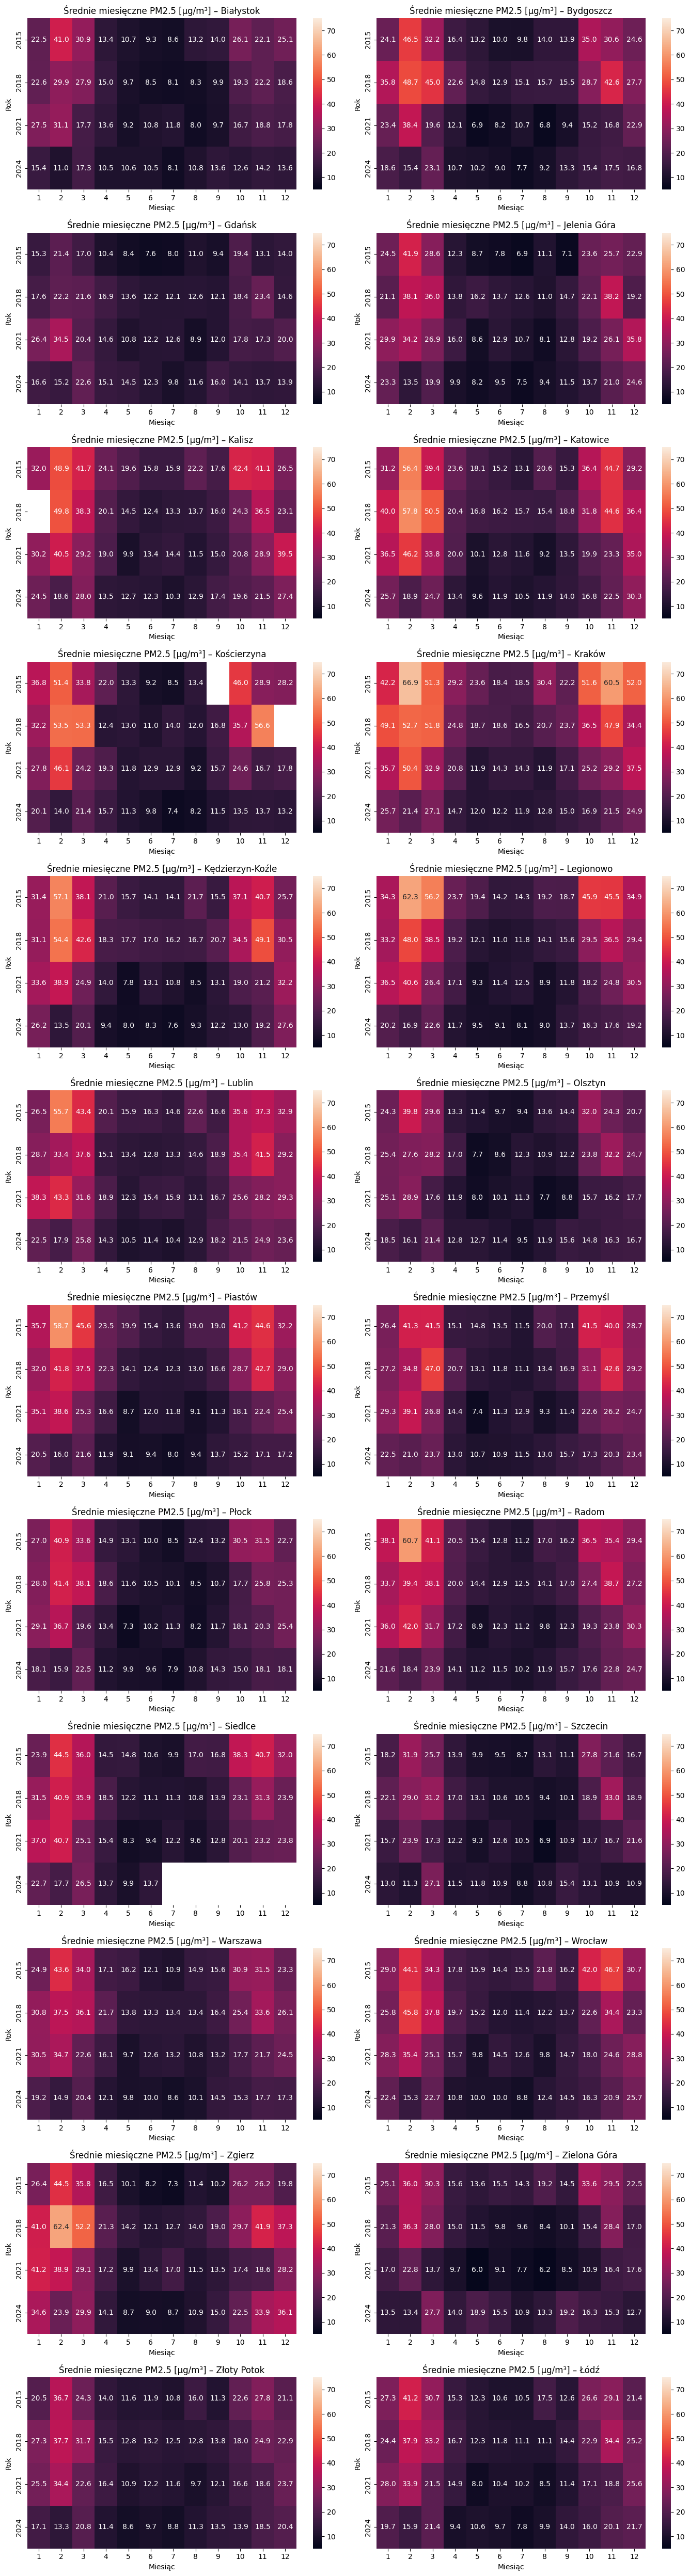

In [36]:
vis.plot_heatmaps_for_cities(df_means)

Patrząc na powyższe wykresy, możemy zauważyć podobny trend we wszystkich raportowanych miastach, a mianowicie najwyższe stężenia drobnego pyłu w sezonie grzewczym, przede wszystkim w lutym i listopadzie/grudniu. Nie jest to zaskakujące, jako że jednym z głównych żródeł PM2.5 w Polsce jest spalanie paliw stałych w domowych piecach i kotłach [[Polski Alarm Smogowy](https://polskialarmsmogowy.pl/smog/skad-sie-bierze-smog/)]. 

Widzimy jednak obiecującą tendecję, jaką jest znaczne obniżenie stężenia PM2.5 w każdym z miast na przeciągu lat 2014-2024. W 2014 roku w każdym z przedstawionych miast zaobserwowane było kilkukrotne – od około dwukrotnego w Gdańsku do pięciokrotnego w Krakowie – przekroczenie dopuszczalnego przez WHO stężenia 15 µg/m³. W 2024 roku, ta wartość nadal była przekraczana w każdym z miast, jendak maksymalne średnie miesięczne stężenie w tym roku wahało się pomiędzy 20.4 (Warszawa) a 36.1 µg/m³ (Zgierz – miasto, w którym poprawa jest najmniejsza). Pokazuje to, że wdrożenie działania antysmogowe wdrażane w ostatniej dekadzie przynoszą realne efekty.

## Zadanie 4
#### Dni z przekroczeniem normy (WHO)

In [37]:
yearly_counts = da.get_who_norm_exceeding_days(df)
selected_stations = da.get_max_and_min_k_stations(yearly_counts, chosen_year=2024, k=3)

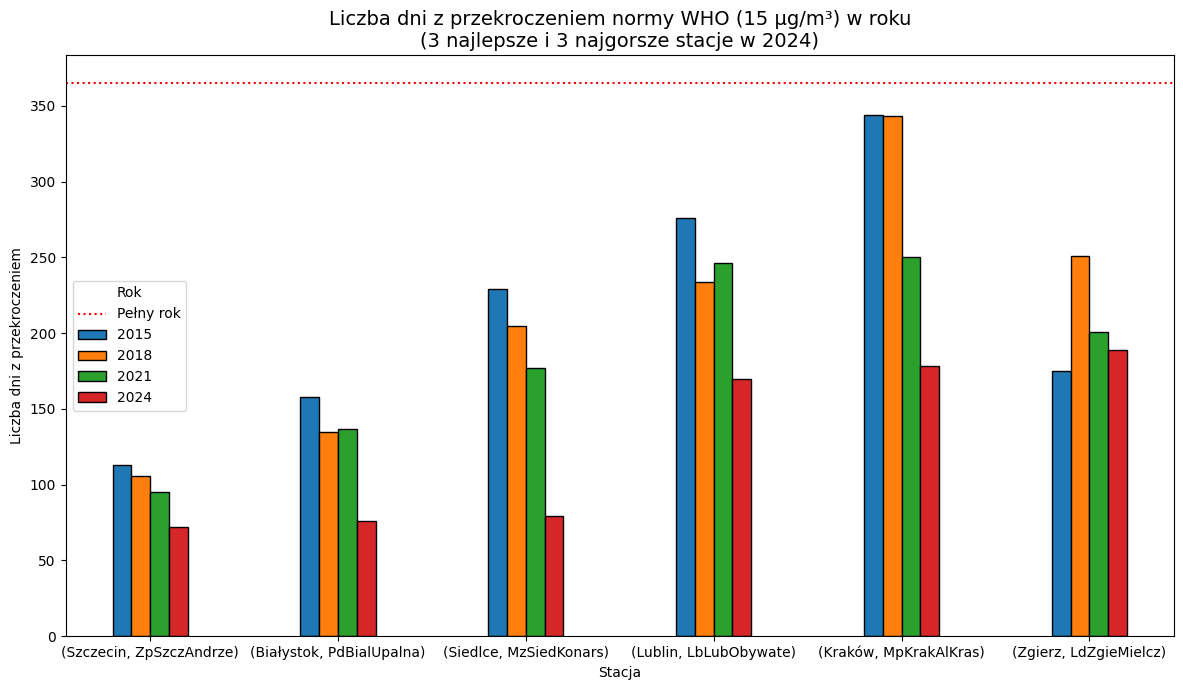

Tabela z wynikami:


('Data', '')                   2015  2018  2021  2024
Miejscowość      Kod stacji                          
Jelenia Góra     DsJelGorOgin   144   198   162   109
Wrocław          DsWrocAlWisn   308   232   211   134
                 DsWrocWybCon   197   196   157   130
Bydgoszcz        KpBydPlPozna   187   239   125   108
                 KpBydWarszaw   163   238   119   123
Lublin           LbLubObywate   276   234   246   170
Łódź             LdLodzCzerni   201   205   175   128
Zgierz           LdZgieMielcz   175   251   201   189
Zielona Góra     LuZielKrotka   225   144    92   145
Kraków           MpKrakAlKras   344   343   250   178
                 MpKrakBulwar   287   220   223   152
Legionowo        MzLegZegrzyn   273   218   168   121
Piastów          MzPiasPulask   297   237   185   124
Płock            MzPlocMiReja   191   169   156   131
Radom            MzRadTochter   240   250   194   161
Siedlce          MzSiedKonars   229   205   177    79
Warszawa         MzWarAlNiepo   235   253   224   152
                 MzWarWokalna   210   226   151   102
Żyrardów         MzZyraRoosev   256   230   200   142
Kędzierzyn-Koźle OpKKozBSmial   265   281   178   111
Białystok        PdBialUpalna   158   135   137    76
Przemyśl         PkPrzemGrunw   238   225   180   146
Gdańsk           PmGdaLeczkow    97   150   138   139
Kościerzyna      PmKosTargowa   177   143   169   102
Katowice         SlKatoKossut   267   285   214   165
Złoty Potok      SlZlotPotLes   173   192   179   117
Olsztyn          WmOlsPuszkin   180   190   130   139
Kalisz           WpKaliSawick   268   197   209   163
Szczecin         ZpSzczAndrze   113   106    95    72
                 ZpSzczPilsud   168   194   117   130

In [38]:
vis.plot_who_exceeding_days(selected_stations)

print("Tabela z wynikami:")
display(yearly_counts[[2015, 2018, 2021, 2024]])

Analizując wykres przedstawiający liczbę dni z przekroczeniem normy WHO (15 µg/m³) w 3 najlepszych i 3 najgorszych stacjach, można zaobserwować dominującą tendencję malejącą w zanieczyszczeniu powietrza na przestrzeni lat 2014, 2019 i 2024. 

Największą bezwzględną poprawę, mierzoną największym spadkiem liczby dni z przekroczeniami, zanotowały stacje o najgorszej jakości powietrza (Kraków, Katowice), gdzie w 2014 roku przekroczenia sięgały odpowiednio 350 i 255 dni. Mimo ogólnej poprawy, w 2024 roku wciąż utrzymują się znaczące dysproporcje, ponieważ stacje w Krakowie, Zgierzu i Katowicach (jako najgorsze) nadal notują ponad 170 dni z przekroczeniem normy, co stanowi prawie połowę roku. 

Z drugiej strony, stacje najlepsze, takie jak Szczecin, osiągnęły duży sukces, redukując liczbę dni smogowych w 2024 roku do około 70, w porównaniu do ponad 175 dni w 2014. Kontrast pomiędzy stacjami o najlepszej i najgorszej jakości powietrza w 2024 roku (np. Szczecin vs. Kraków) wyraźnie wskazuje na potrzebę skupienia interwencji w najbardziej zanieczyszczonych lokalizacjach.